# Sample based quantum diagonalization vs. Variational Quantum Eigensolver

Note:

The SQD run was ran on samples generated from MPS simulations that were fed into the `python/sqd.py` example.
The VQE run was from a code similar to `python/pec_sim.py`.

/tmp/ipykernel_11430/2462120656.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


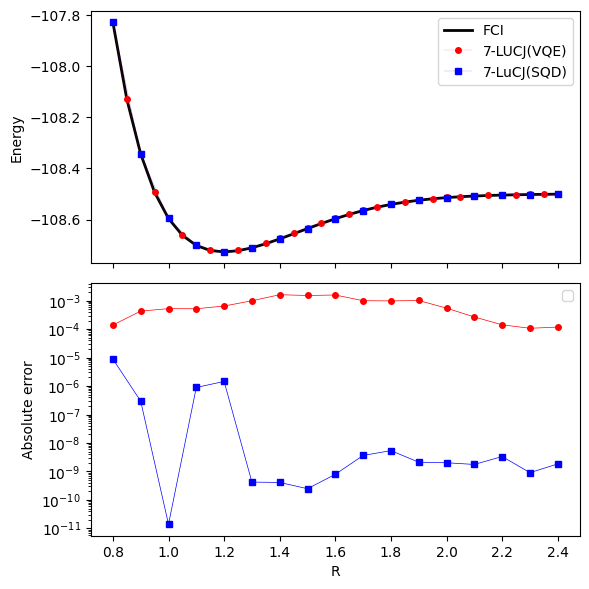

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib

data = np.loadtxt("../data/mps/sto-6g/n2_sqd.csv", skiprows=1, delimiter=",") # this run is from python/tensor-networks/mps_circuit_simulator.py
R, E_sqd, E_sqd_no_reg = data[:, 0], data[:, 1], data[:, 2]

data2 = np.loadtxt("../data/classical/n2_sto-6g.csv", skiprows=1, delimiter=",")  # this is a run from python/pec_sim.py
R2, E_FCI = data2[:, 0], data2[:, 1]
E_opt = data2[:, -1]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

ax1.plot(R2, E_FCI, label="FCI", c="k", linewidth=2)
ax1.plot(R2, E_opt, label="7-LUCJ(VQE)", c="red", marker="o",markersize=4, linewidth=0.1)
ax1.plot(R, E_sqd, label="7-LuCJ(SQD)", marker="s", c="blue",markersize=4, linewidth=0.1)
ax1.set_ylabel("Energy")
ax1.legend()

E_FCI_on_R = np.interp(R, R2, E_FCI)
E_opt_on_R = np.interp(R, R2, E_opt)

err_opt = np.abs(E_opt_on_R - E_FCI_on_R)
err_sqd = np.abs(E_sqd - E_FCI_on_R)
err_sqd_no_reg = np.abs(E_sqd_no_reg - E_FCI_on_R)


ax2.semilogy(R, err_opt, c="red", marker="o", linewidth=0.5,markersize=4)
ax2.semilogy(R, err_sqd, marker="s", c="blue", linewidth=0.5,markersize=4)

ax2.set_xlabel("R")
ax2.set_ylabel("Absolute error")
ax2.legend()

plt.tight_layout()